In [1]:
from google.colab import files
uploaded = files.upload()

Saving movie_metadata_cleaned_capped.csv to movie_metadata_cleaned_capped.csv


In [2]:
"""
WEEK 4: EDA DEEP DIVE
Univariate and Bivariate Analysis
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)

# 1. Load Cleaned Data

df = pd.read_csv('movie_metadata_cleaned_capped.csv')
print("Loaded cleaned capped dataset")
print("Dataset Shape:", df.shape)


Loaded cleaned capped dataset
Dataset Shape: (5043, 28)


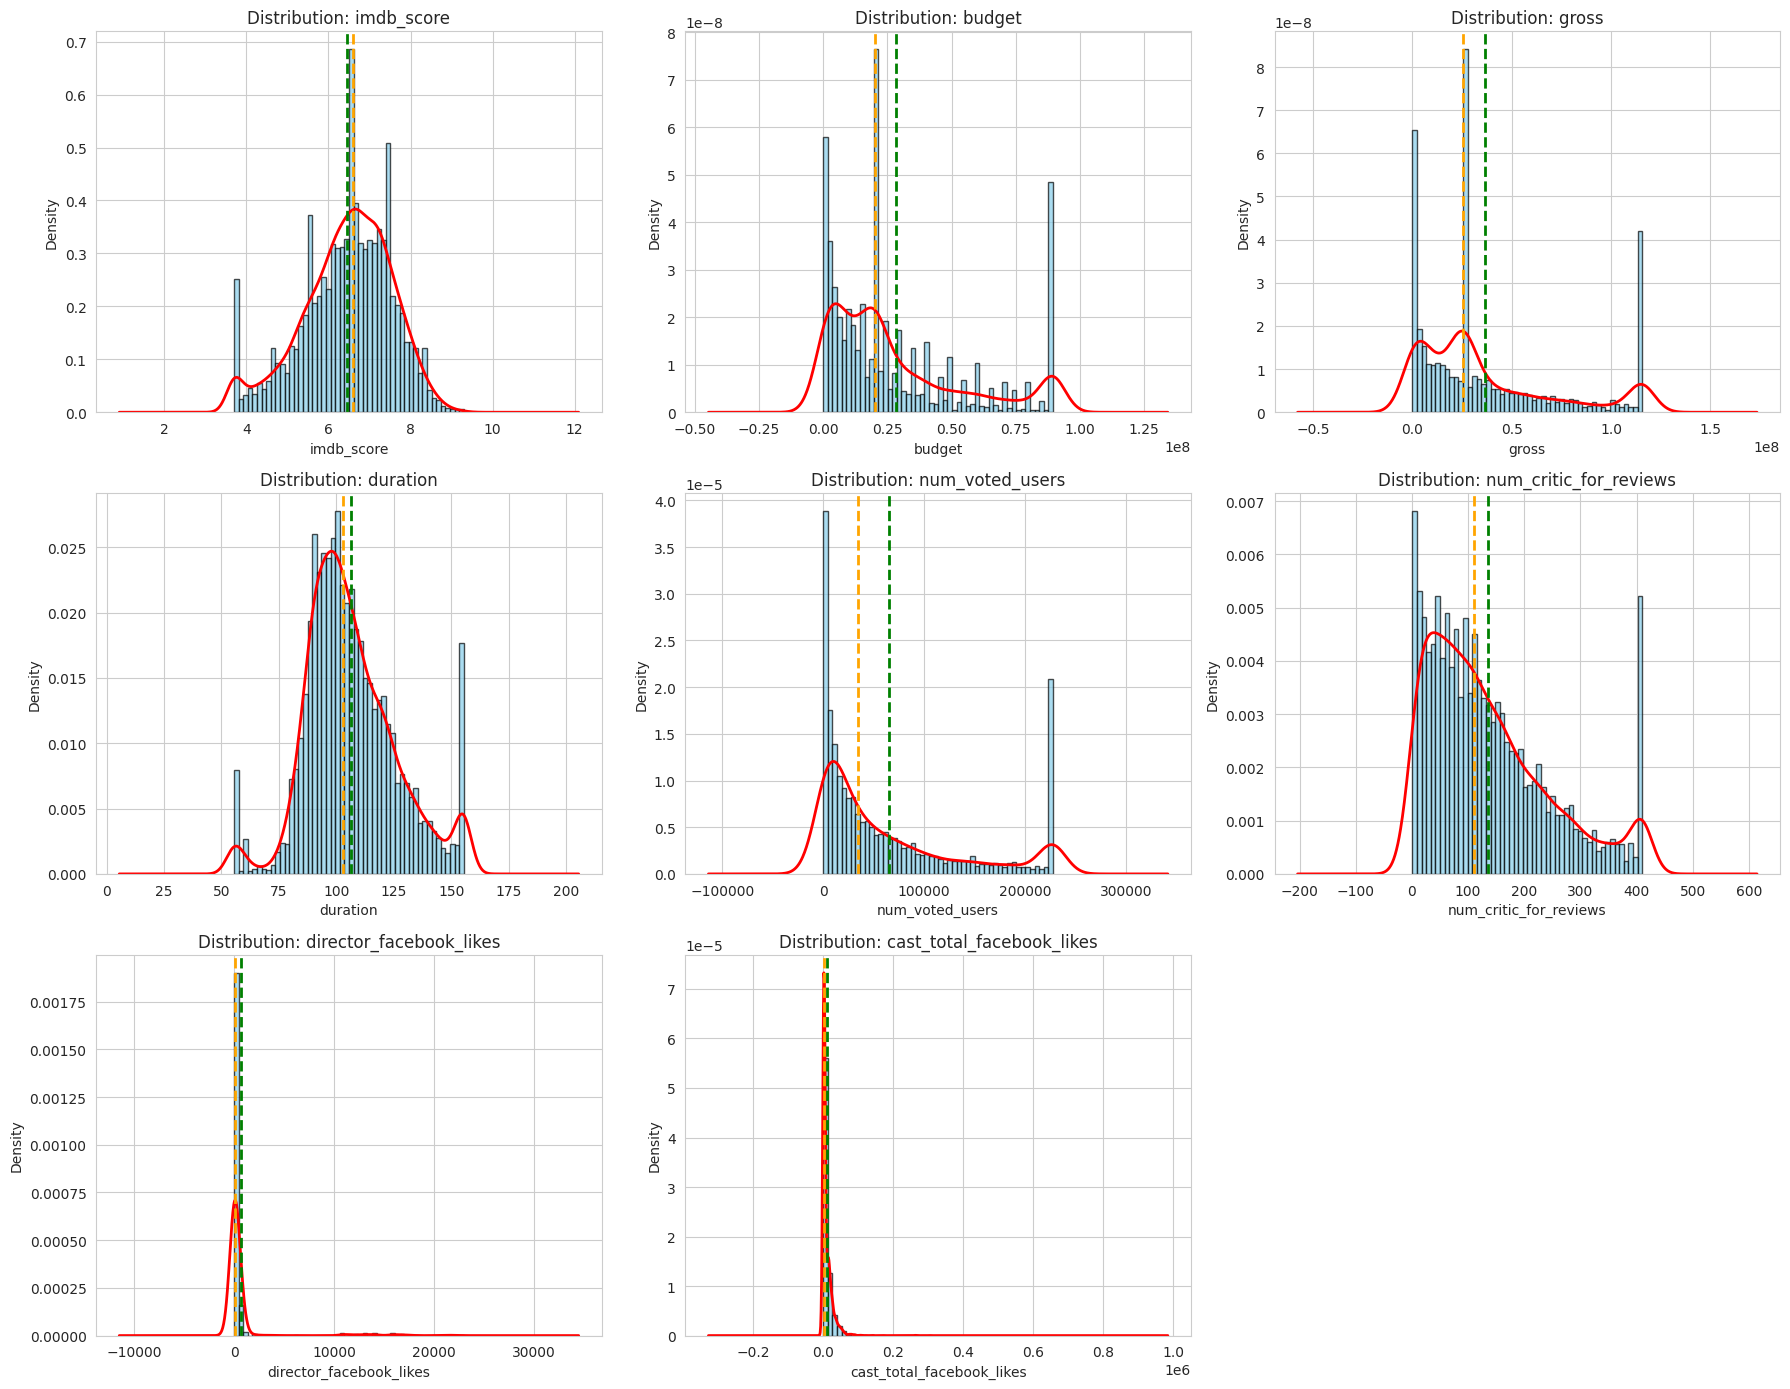

In [3]:
# PART A: UNIVARIATE ANALYSIS

numeric_features = ['imdb_score', 'budget', 'gross', 'duration',
                    'num_voted_users', 'num_critic_for_reviews',
                    'director_facebook_likes', 'cast_total_facebook_likes']
numeric_features = [col for col in numeric_features if col in df.columns]

# Distribution Plots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    data = df[col].dropna()
    axes[idx].hist(data, bins=50, color='skyblue',
                   edgecolor='black', alpha=0.7, density=True)
    data.plot(kind='kde', ax=axes[idx], color='red', linewidth=2)

    mean_val = data.mean()
    median_val = data.median()

    axes[idx].axvline(mean_val, color='green', linestyle='--', linewidth=2)
    axes[idx].axvline(median_val, color='orange', linestyle='--', linewidth=2)

    axes[idx].set_title(f'Distribution: {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Density')

for idx in range(len(numeric_features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('univariate_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
# Descriptive Statistics
summary_stats = df[numeric_features].describe().T
summary_stats['skewness'] = df[numeric_features].skew()
summary_stats['kurtosis'] = df[numeric_features].kurtosis()
print("\nDescriptive Statistics:")
print(summary_stats)




Descriptive Statistics:
                            count          mean           std    min  \
imdb_score                 5043.0  6.457466e+00  1.079434e+00    3.7   
budget                     5043.0  2.818438e+07  2.702468e+07  218.0   
gross                      5043.0  3.650675e+07  3.576465e+07  162.0   
duration                   5043.0  1.064026e+02  1.971491e+01   55.5   
num_voted_users            5043.0  6.538226e+04  7.316421e+04    5.0   
num_critic_for_reviews     5043.0  1.358971e+02  1.084100e+02    1.0   
director_facebook_likes    5043.0  6.733621e+02  2.785637e+03    0.0   
cast_total_facebook_likes  5043.0  9.699064e+03  1.816380e+04    0.0   

                                 25%         50%         75%           max  \
imdb_score                       5.8         6.6         7.2  9.300000e+00   
budget                     7000000.0  20000000.0  40000000.0  8.950000e+07   
gross                      8460992.5  25517500.0  51357065.5  1.157012e+08   
duration      

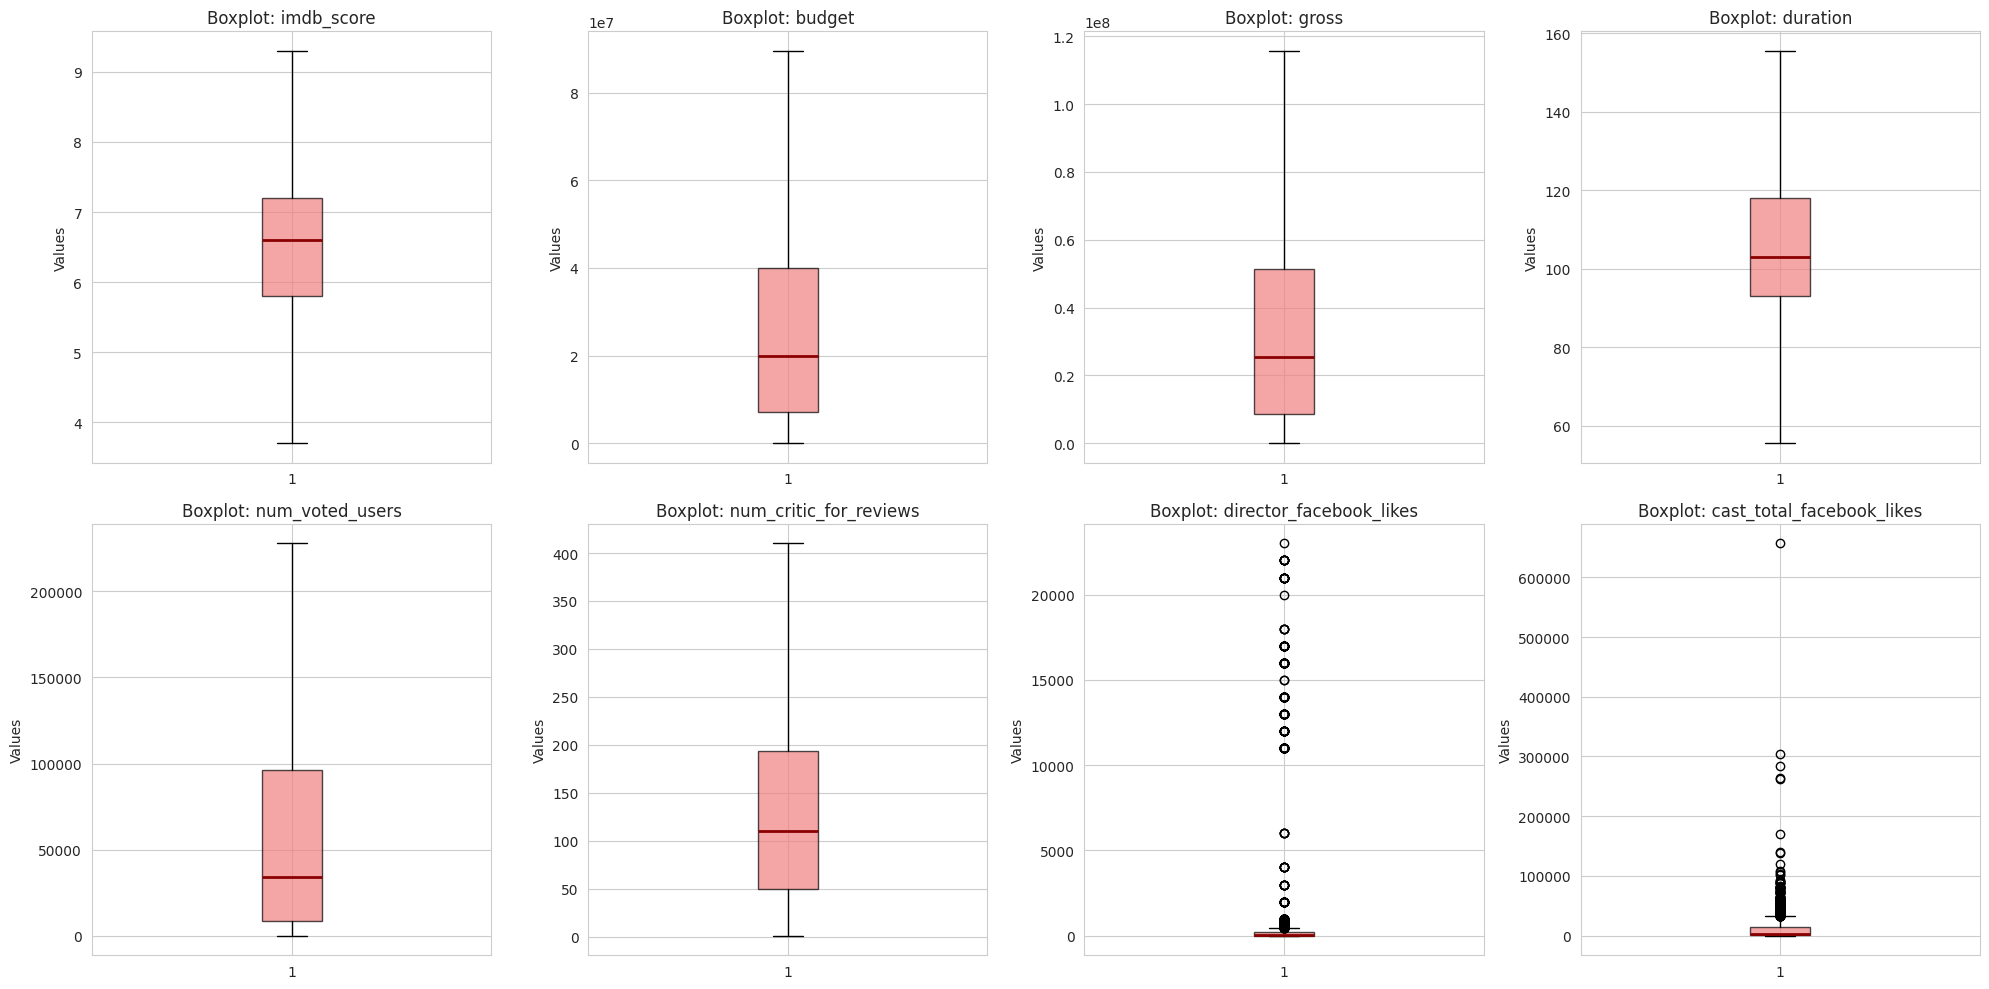

In [5]:
# Boxplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    axes[idx].boxplot(df[col].dropna(),
                      patch_artist=True,
                      boxprops=dict(facecolor='lightcoral', alpha=0.7),
                      medianprops=dict(color='darkred', linewidth=2))
    axes[idx].set_title(f'Boxplot: {col}')
    axes[idx].set_ylabel('Values')

for idx in range(len(numeric_features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('univariate_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()



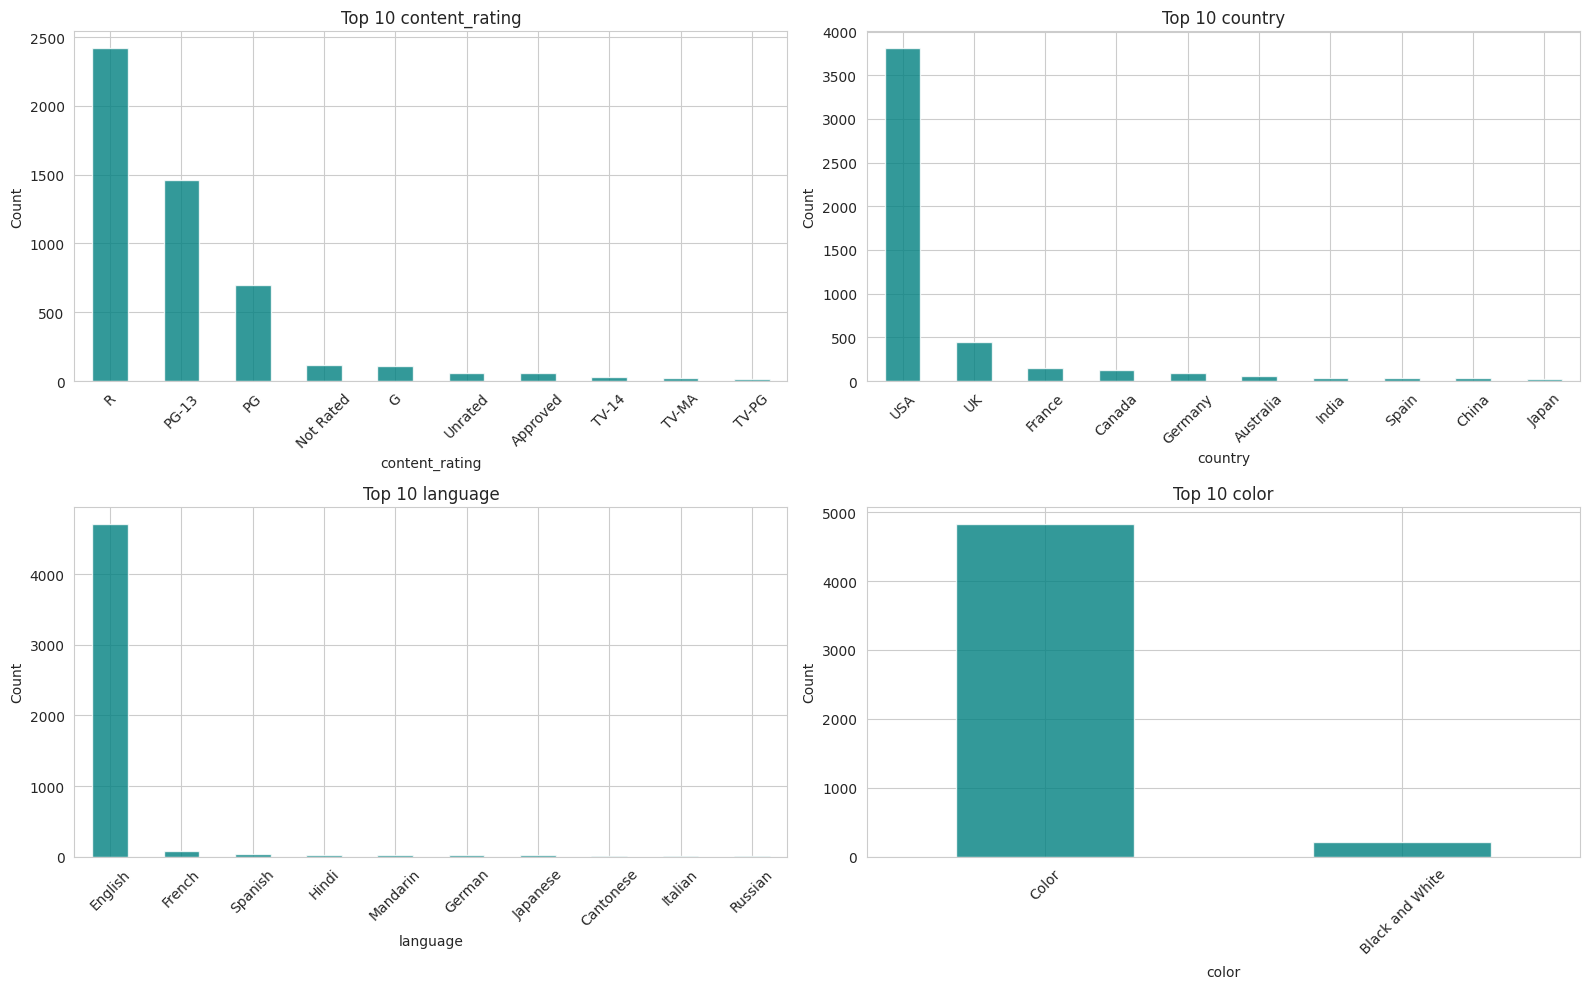

In [6]:
# Categorical Analysis
categorical_features = ['content_rating', 'country', 'language', 'color']
categorical_features = [col for col in categorical_features if col in df.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    top_categories = df[col].value_counts().head(10)
    top_categories.plot(kind='bar', ax=axes[idx], color='teal', alpha=0.8)
    axes[idx].set_title(f'Top 10 {col}')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



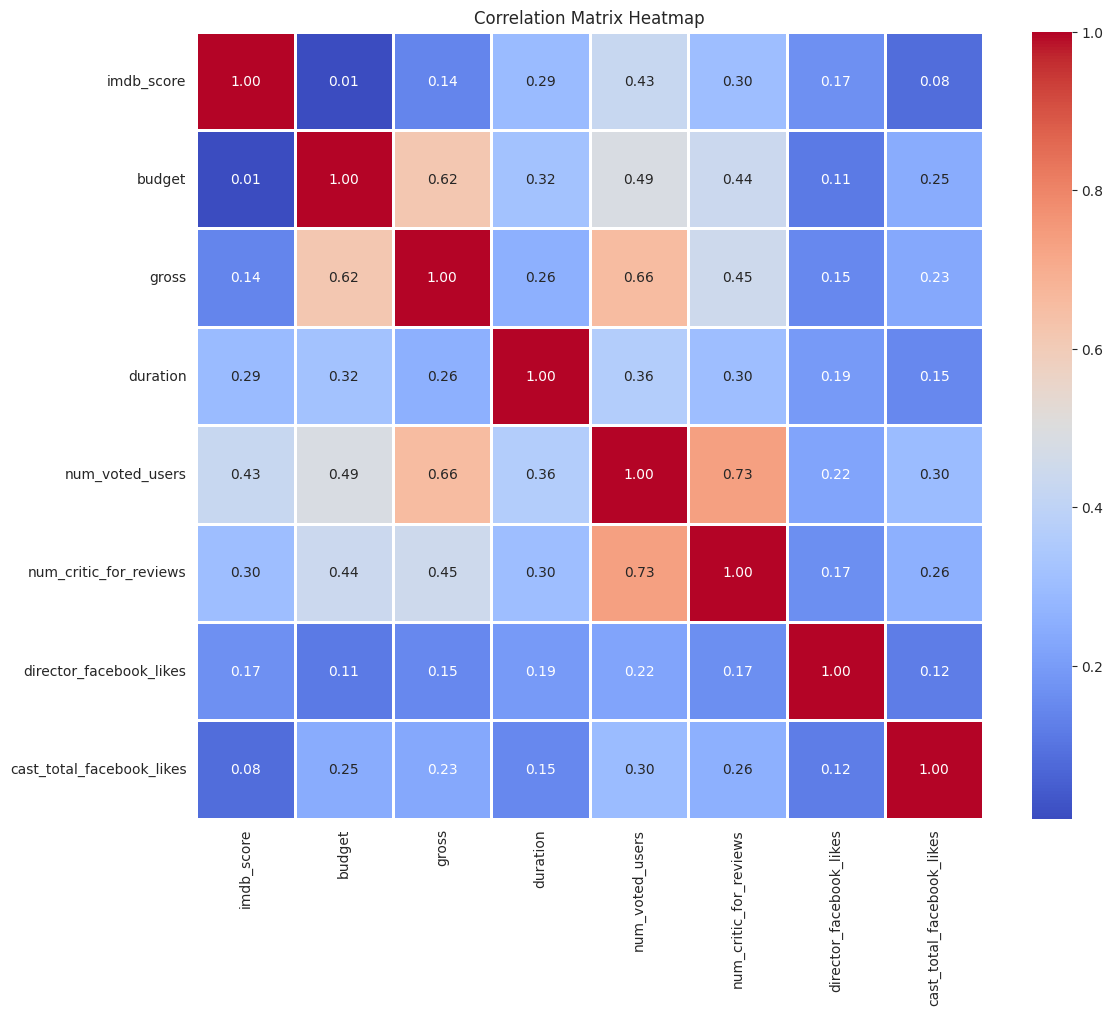


Strong Correlations (|r| > 0.5):
budget ↔ gross: 0.616
gross ↔ num_voted_users: 0.655
num_voted_users ↔ num_critic_for_reviews: 0.734


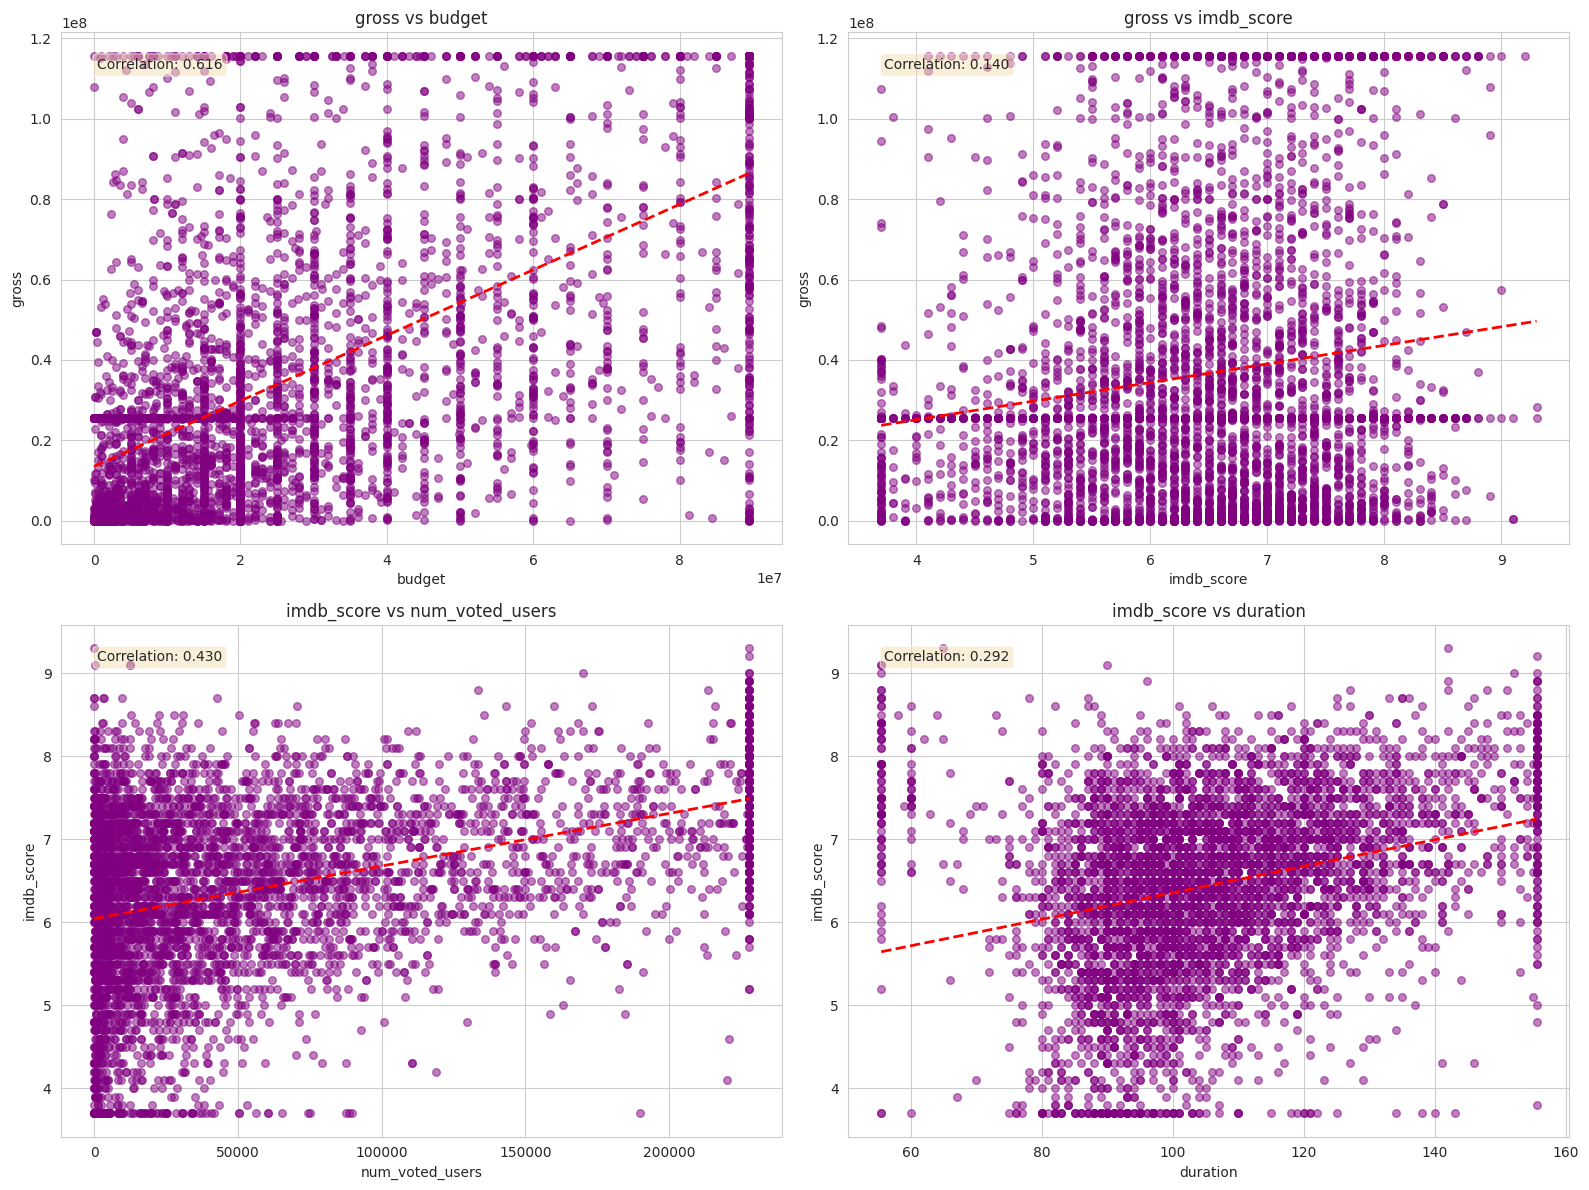

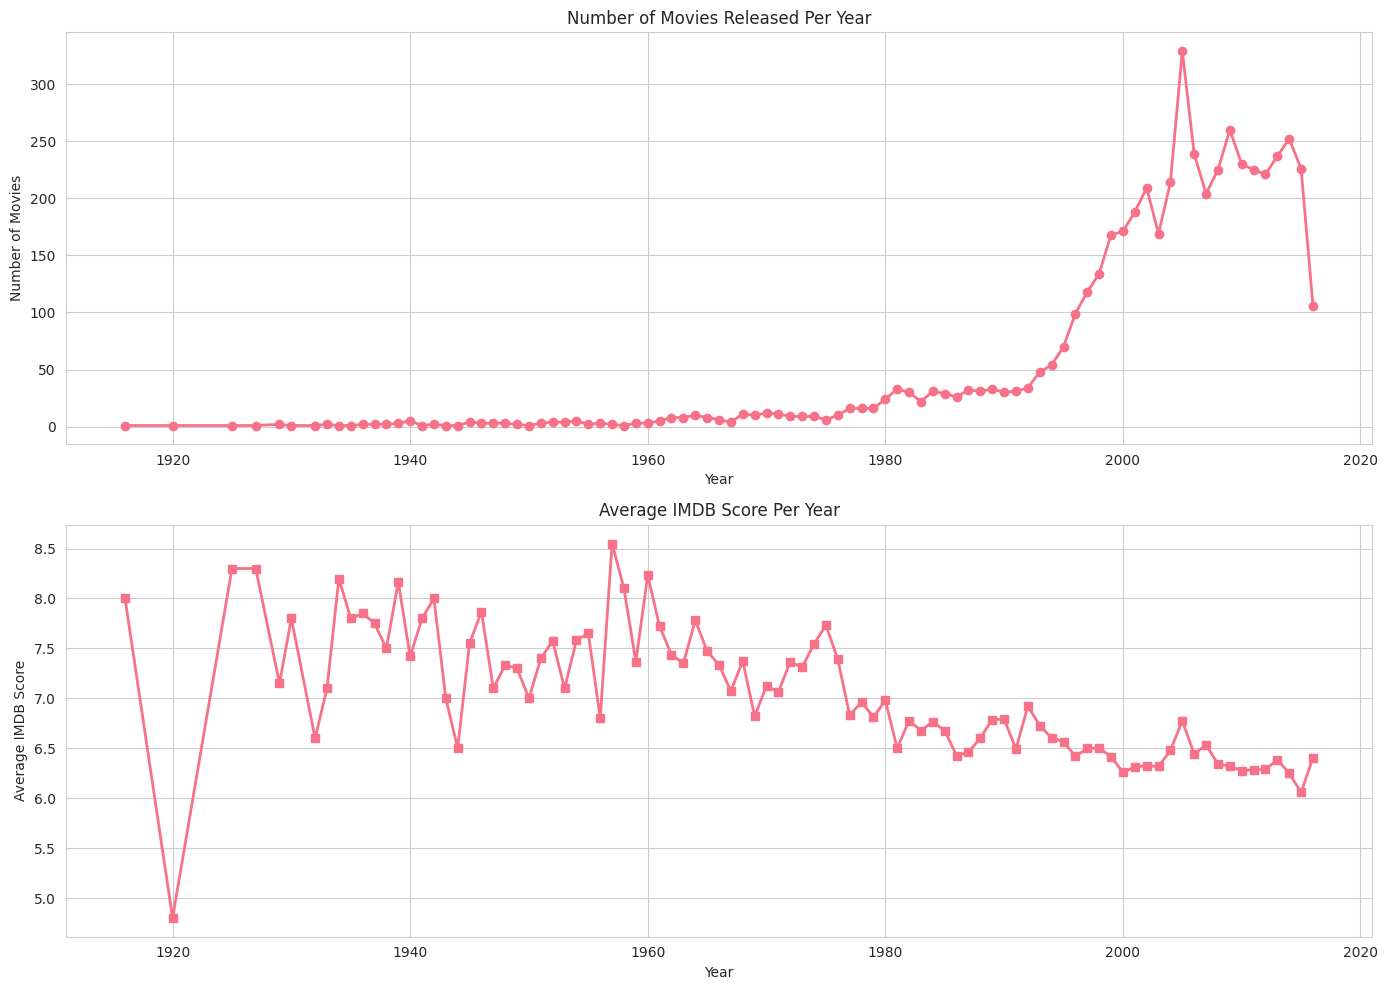

In [7]:
# PART B: BIVARIATE ANALYSIS
# Correlation Heatmap
correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            square=True,
            linewidths=1)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# Strong correlations
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        r = correlation_matrix.iloc[i, j]
        if abs(r) > 0.5:
            strong_corr.append((correlation_matrix.columns[i],
                                correlation_matrix.columns[j],
                                round(r, 3)))

print("\nStrong Correlations (|r| > 0.5):")
if strong_corr:
    for var1, var2, r in strong_corr:
        print(f"{var1} ↔ {var2}: {r}")
else:
    print("None")


# Scatter Plots
relationships = [
    ('budget', 'gross'),
    ('imdb_score', 'gross'),
    ('num_voted_users', 'imdb_score'),
    ('duration', 'imdb_score')
]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, (x_col, y_col) in enumerate(relationships):
    if x_col in df.columns and y_col in df.columns:
        axes[idx].scatter(df[x_col], df[y_col],
                          alpha=0.5, s=30, color='purple')

        z = np.polyfit(df[x_col], df[y_col], 1)
        p = np.poly1d(z)
        axes[idx].plot(df[x_col].sort_values(),
                       p(df[x_col].sort_values()),
                       "r--", linewidth=2)

        corr = df[[x_col, y_col]].corr().iloc[0, 1]

        axes[idx].set_title(f'{y_col} vs {x_col}')
        axes[idx].set_xlabel(x_col)
        axes[idx].set_ylabel(y_col)
        axes[idx].text(0.05, 0.95,
                       f'Correlation: {corr:.3f}',
                       transform=axes[idx].transAxes,
                       bbox=dict(boxstyle='round',
                                 facecolor='wheat',
                                 alpha=0.5),
                       verticalalignment='top')

plt.tight_layout()
plt.savefig('bivariate_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()





# Time Series
if 'title_year' in df.columns:
    movies_per_year = df['title_year'].value_counts().sort_index()
    avg_score_per_year = df.groupby('title_year')['imdb_score'].mean()

    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    axes[0].plot(movies_per_year.index, movies_per_year.values,
                 marker='o', linewidth=2)
    axes[0].set_title('Number of Movies Released Per Year')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number of Movies')

    axes[1].plot(avg_score_per_year.index, avg_score_per_year.values,
                 marker='s', linewidth=2)
    axes[1].set_title('Average IMDB Score Per Year')
    axes[1].set_xlabel('Year')
    axes[1].set_ylabel('Average IMDB Score')

    plt.tight_layout()
    plt.savefig('time_series_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()